In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve ,roc_auc_score, auc

In [2]:
def report(y_test,y_hat,y_prob):
    print(classification_report(y_test,y_hat))
    print(f' AUC {roc_auc_score(y_test,y_prob)}')

In [3]:
PATH = '../dataset_fog_release/dataset/'

In [4]:
df = pd.read_csv(PATH+'fog.csv')

---------------

Shift Annotate 1 timestep

In [5]:
for i in range(1,11):
    shift1 = df.loc[df['subjectID']==i]['Annotate'].shift(1).rename('Ann_1')
    shift05s = df.loc[df['subjectID']==i]['Annotate'].shift(30).rename('Ann_05s')
    shift1s = df.loc[df['subjectID']==i]['Annotate'].shift(60).rename('Ann_1s')
    thigh_v1 = df.loc[df['subjectID']==i]['thigh_v'].shift(1).rename('thigh_v1')
    thigh_v30 = df.loc[df['subjectID']==i]['thigh_v'].shift(30).rename('thigh_v30')
    thigh_mean05s = thigh_v1.rolling(window=30).mean().rename('thigh_mean05s')
    thigh_max05s = thigh_v1.rolling(window=30).max().rename('thigh_max05s')
    thigh_min05s = thigh_v1.rolling(window=30).min().rename('thigh_min05s')
    thigh_std05s = thigh_v1.rolling(window=30).std().rename('thigh_std05s')
    thigh_mean1s = thigh_v1.rolling(window=60).mean().rename('thigh_mean1s')
    trunk_hl1 = df.loc[df['subjectID']==i]['trunk_hl'].shift(1).rename('trunk_hl1')
    trunk_hl30 = df.loc[df['subjectID']==i]['trunk_hl'].shift(30).rename('trunk_hl30')
    trunk_mean05s = trunk_hl1.rolling(window=30).mean().rename('trunk_mean05s')
    trunk_max05s = trunk_hl1.rolling(window=30).max().rename('trunk_max05s')
    trunk_min05s = trunk_hl1.rolling(window=30).min().rename('trunk_min05s')
    trunk_std05s = trunk_hl1.rolling(window=30).std().rename('trunk_std05s')
    trunk_mean1s = trunk_hl1.rolling(window=60).mean().rename('trunk_mean1s')                                                                   
    thigh_hf1 = df.loc[df['subjectID']==i]['thigh_hf'].shift(1).rename('thigh_hf1')
    thigh_hf30 = df.loc[df['subjectID']==i]['thigh_hf'].shift(30).rename('thigh_hf30')
    thighf_mean05s = thigh_hf1.rolling(window=30).mean().rename('thighf_mean05s')
    thighf_min05s = thigh_hf1.rolling(window=30).min().rename('thighf_min05s')
    thighf_max05s = thigh_hf1.rolling(window=30).max().rename('thighf_max05s')
    thighf_std05s = thigh_hf1.rolling(window=30).std().rename('thighf_std05s')
    thighf_mean1s = thigh_hf1.rolling(window=60).mean().rename('thighf_mean1s')                                                                   
    combine = pd.concat([thigh_v1,thigh_v30,thigh_mean05s,thigh_max05s,thigh_min05s,thigh_std05s,thigh_mean1s,
                         trunk_hl1,trunk_hl30,trunk_mean05s,trunk_max05s,trunk_min05s,trunk_std05s,trunk_mean1s,
                         thigh_hf1,thigh_hf30,thighf_mean05s,thighf_max05s,thighf_min05s,thighf_std05s,thighf_mean1s,
                         shift1,shift05s,shift1s], axis =1)
    if i==1:
        df_new = pd.concat([df.loc[df['subjectID']==i],combine],axis=1)
    else:
        df_new = pd.concat([df_new,pd.concat([df.loc[df['subjectID']==i],combine],axis=1)],axis=0)
            

In [6]:
df_new.head()

,subjectID,round,Time_ms,shank_hf,shank_v,shank_hl,thigh_hf,thigh_v,thigh_hl,trunk_hf,...,thigh_hf1,thigh_hf30,thighf_mean05s,thighf_max05s,thighf_min05s,thighf_std05s,thighf_mean1s,Ann_1,Ann_05s,Ann_1s
542415,1,1,750000,-30,990,326,-45,972,181,-38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542416,1,1,750015,-30,1000,356,-18,981,212,-48,...,-45.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
542417,1,1,750031,-20,990,336,18,981,222,-38,...,-18.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
542418,1,1,750046,-20,1000,316,36,990,222,-19,...,18.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
542419,1,1,750062,0,990,316,36,990,212,-29,...,36.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [7]:
df_new.shape

(1140835, 37)

In [8]:
df_new.dropna(inplace=True)

In [9]:
df_new.columns

Index(['subjectID', 'round', 'Time_ms', 'shank_hf', 'shank_v', 'shank_hl',
       'thigh_hf', 'thigh_v', 'thigh_hl', 'trunk_hf', 'trunk_v', 'trunk_hl',
       'Annotate', 'thigh_v1', 'thigh_v30', 'thigh_mean05s', 'thigh_max05s',
       'thigh_min05s', 'thigh_std05s', 'thigh_mean1s', 'trunk_hl1',
       'trunk_hl30', 'trunk_mean05s', 'trunk_max05s', 'trunk_min05s',
       'trunk_std05s', 'trunk_mean1s', 'thigh_hf1', 'thigh_hf30',
       'thighf_mean05s', 'thighf_max05s', 'thighf_min05s', 'thighf_std05s',
       'thighf_mean1s', 'Ann_1', 'Ann_05s', 'Ann_1s'],
      dtype='object')

ann = df_new['Annotate']
df_new.drop(['Annotate'],axis=1 ,inplace=True)
df_new.insert(len(df_new.columns),column='Ann',value=ann)

In [14]:
df_new.columns

Index(['subjectID', 'round', 'Time_ms', 'shank_hf', 'shank_v', 'shank_hl',
       'thigh_hf', 'thigh_v', 'thigh_hl', 'trunk_hf', 'trunk_v', 'trunk_hl',
       'thigh_v1', 'thigh_v30', 'thigh_mean05s', 'thigh_max05s',
       'thigh_min05s', 'thigh_std05s', 'thigh_mean1s', 'trunk_hl1',
       'trunk_hl30', 'trunk_mean05s', 'trunk_max05s', 'trunk_min05s',
       'trunk_std05s', 'trunk_mean1s', 'thigh_hf1', 'thigh_hf30',
       'thighf_mean05s', 'thighf_max05s', 'thighf_min05s', 'thighf_std05s',
       'thighf_mean1s', 'Ann_1', 'Ann_05s', 'Ann_1s', 'Ann'],
      dtype='object')

In [15]:
df = df_new.copy()

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(1140235, 37)

--------------------------------

In [18]:
from sklearn.utils import random

In [19]:
scaler = StandardScaler()

In [20]:
#For Feature Engineering Data
df.iloc[:,3:33] = scaler.fit_transform(X = df.iloc[:,3:33])

In [120]:
#Sample data
df_sample = df.loc[random.sample_without_replacement(len(df),100000)]

/Users/macbookpro/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [83]:
df_sample.describe()

,subjectID,round,Time_ms,shank_hf,shank_v,shank_hl,thigh_hf,thigh_v,thigh_hl,trunk_hf,...,thighf_mean2,thigh_hf2,thighf_mean3,thighf_mean05s,thighf_mean1s,Ann_1,Ann_2,Ann_05s,Ann_1s,Ann
count,99948.000000,99948.000000,9.994800e+04,99948.000000,99948.000000,99948.000000,99948.000000,99948.000000,99948.000000,99948.000000,...,99948.000000,99948.000000,99948.000000,99948.000000,99948.000000,99948.000000,99948.000000,99948.000000,99948.000000,99948.000000
mean,5.423720,1.237604,1.297053e+06,-0.001101,0.001983,0.002593,0.000797,0.002446,0.002166,-0.003346,...,0.000934,0.003046,0.002050,0.001437,0.001608,1.098981,1.099072,1.099252,1.098471,1.098991
std,2.888594,0.467172,6.409685e+05,1.065190,1.031688,1.064312,1.006461,1.012060,1.027888,0.992931,...,1.002233,1.007209,1.004996,0.996178,0.996410,0.298639,0.298760,0.299001,0.297952,0.298652
min,1.000000,1.000000,1.850150e+05,-48.834675,-91.733310,-75.767497,-11.762412,-62.013743,-75.689217,-13.534847,...,-7.759080,-8.386874,-6.105141,-3.929279,-3.130807,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,7.882182e+05,-0.357577,-0.236898,-0.295013,-0.526778,-0.833338,-0.463915,-0.604640,...,-0.526781,-0.526782,-0.541689,-0.433745,-0.402769,1.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,1.000000,1.178781e+06,0.047965,-0.018957,-0.017575,-0.044039,0.426907,-0.020400,-0.084857,...,-0.044038,-0.044036,-0.045359,-0.061856,-0.062960,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,1.000000,1.770492e+06,0.380405,0.116221,0.322209,0.534188,0.579334,0.459769,0.588385,...,0.534193,0.534198,0.532934,0.330767,0.299496,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.000000,3.000000,2.929671e+06,39.498702,59.586407,78.251111,39.959698,50.929253,6.753286,7.701979,...,39.959951,39.960209,41.160064,13.727578,8.668000,2.000000,2.000000,2.000000,2.000000,2.000000


In [121]:
df_sample.dropna(inplace=True)

In [22]:
y = df['Ann_1'].values

In [23]:
#For Feature Engineering data
X = df.iloc[:,3:33].values

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

## Model

## Rf

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
df.columns

Index(['subjectID', 'round', 'Time_ms', 'shank_hf', 'shank_v', 'shank_hl',
       'thigh_hf', 'thigh_v', 'thigh_hl', 'trunk_hf', 'trunk_v', 'trunk_hl',
       'thigh_v1', 'thigh_v30', 'thigh_mean05s', 'thigh_max05s',
       'thigh_min05s', 'thigh_std05s', 'thigh_mean1s', 'trunk_hl1',
       'trunk_hl30', 'trunk_mean05s', 'trunk_max05s', 'trunk_min05s',
       'trunk_std05s', 'trunk_mean1s', 'thigh_hf1', 'thigh_hf30',
       'thighf_mean05s', 'thighf_max05s', 'thighf_min05s', 'thighf_std05s',
       'thighf_mean1s', 'Ann_1', 'Ann_05s', 'Ann_1s', 'Ann'],
      dtype='object')

In [27]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, class_weight="balanced", oob_score=True)
m.fit(X_train, y_train)
m.score(X_test,y_test)

0.9809425250058103

In [28]:
y_hat = m.predict(X_test)

In [37]:
y_prob = m.predict_proba(X_test)[:,1]

In [39]:
confusion_matrix(y_test,y_hat, labels=[1,2])

array([[204495,   1395],
       [  2951,  19206]])

In [40]:
report(y_test,y_hat,y_prob)

              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99    205890
         2.0       0.93      0.87      0.90     22157

    accuracy                           0.98    228047
   macro avg       0.96      0.93      0.94    228047
weighted avg       0.98      0.98      0.98    228047

 AUC 0.995880182925258


In [41]:
m.oob_score_

0.9772130306471911

In [42]:
m = RandomForestClassifier(n_estimators=120, min_samples_leaf=3, max_features=0.4, n_jobs=-1, class_weight={1:1,2:5}, oob_score=True)
m.fit(X_train, y_train)
m.score(X_test,y_test)

0.9821703420786067

In [43]:
y_hat = m.predict(X_test)

In [44]:
y_prob = m.predict_proba(X_test)[:,1]

In [45]:
m.oob_score_

0.9815575298074519

In [46]:
report(y_test,y_hat,y_prob)

              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99    205890
         2.0       0.95      0.86      0.90     22157

    accuracy                           0.98    228047
   macro avg       0.97      0.93      0.95    228047
weighted avg       0.98      0.98      0.98    228047

 AUC 0.996811468813817


In [47]:
confusion_matrix(y_test,y_hat, labels=[1,2])

array([[204881,   1009],
       [  3057,  19100]])

Features Importance

In [48]:
importances = RandomForestClassifier.feature_importances_

In [49]:
std = np.std([tree.feature_importances_ for tree in m.estimators_],
             axis=0)

In [50]:
std

array([0.00509444, 0.00219571, 0.00318068, 0.00224224, 0.00112476,
       0.00189133, 0.00273599, 0.00104467, 0.00207663, 0.01425188,
       0.01431548, 0.050416  , 0.06844871, 0.00877731, 0.07409557,
       0.05650757, 0.00096648, 0.00216354, 0.01595921, 0.00648982,
       0.00403575, 0.02966417, 0.01855244, 0.00230355, 0.00163115,
       0.00504291, 0.00537978, 0.00727204, 0.09323486, 0.00521173])

Feature ranking:
1 feature 28 0.09323485731444056
2 feature 14 0.07409557152132512
3 feature 12 0.06844871238058177
4 feature 15 0.05650756810206571
5 feature 11 0.05041600147081336
6 feature 21 0.029664172817369203
7 feature 22 0.018552443145462987
8 feature 18 0.01595921211529169
9 feature 10 0.014315484462442803
10 feature 9 0.014251877514646108
11 feature 13 0.008777308088652907
12 feature 27 0.007272037252327726
13 feature 19 0.006489822801093435
14 feature 26 0.005379780001187673
15 feature 29 0.005211727126572531
16 feature 0 0.005094435387287601
17 feature 25 0.005042910177314219
18 feature 20 0.00403574514661169
19 feature 2 0.0031806794338663596
20 feature 6 0.0027359858665963245
21 feature 23 0.0023035521622330832
22 feature 3 0.002242243011274311
23 feature 1 0.0021957142498763593
24 feature 17 0.0021635380148463464
25 feature 8 0.0020766250026381977
26 feature 5 0.0018913341760223585
27 feature 24 0.0016311450120788528
28 feature 4 0.001124762650039781
29 feature 7 0.00104

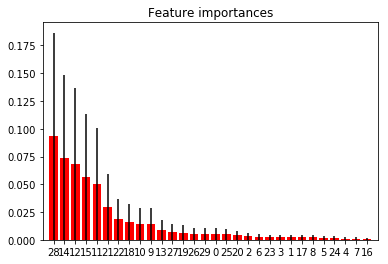

In [51]:
indices = np.argsort(std)[::-1]

# Print the feature ranking
print("Feature ranking:")

for i in range(X_train.shape[1]):
    print(f'{i+1} feature {indices[i]} {std[indices[i]]}' )

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), std[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [52]:
top10=[]
top5=[]
for index,val in enumerate(np.argsort(m.feature_importances_)[::-1]):
    print(index, df.columns[3:33][val],m.feature_importances_[val])
    if index<5:
        top10.append(df.columns[3:33][val])
        top5.append(df.columns[3:33][val])
    elif 5<= index <10:
        top10.append(df.columns[3:33][val])
    

0 thighf_std05s 0.11382259983725795
1 thigh_mean1s 0.07901203547968652
2 thigh_std05s 0.07424010343967988
3 trunk_mean1s 0.06869030917985994
4 thigh_mean05s 0.06538365195929319
5 thigh_max05s 0.05817648819914439
6 shank_hf 0.0500957350008727
7 thighf_mean1s 0.04882675471447786
8 trunk_mean05s 0.04873983189781948
9 thighf_max05s 0.03968979412626438
10 thighf_min05s 0.03416618462072311
11 trunk_max05s 0.03239990794444071
12 trunk_std05s 0.03193445411918786
13 thighf_mean05s 0.030968205355958168
14 thigh_min05s 0.02570744812229148
15 shank_hl 0.025340247411519953
16 trunk_hf 0.02438025881706018
17 trunk_min05s 0.02353760538728766
18 shank_v 0.018175402632902012
19 thigh_hl 0.016069430769358867
20 thigh_hf 0.012096347379413206
21 thigh_hf1 0.01057211353057316
22 thigh_hf30 0.009883061751691059
23 thigh_v30 0.009795370113123099
24 trunk_hl 0.008725669743477419
25 thigh_v1 0.00851288219853136
26 thigh_v 0.007870743357661436
27 trunk_hl30 0.0078586911722534
28 trunk_v 0.0076962432079799425
29

In [53]:
top10

['thighf_std05s',
 'thigh_mean1s',
 'thigh_std05s',
 'trunk_mean1s',
 'thigh_mean05s',
 'thigh_max05s',
 'shank_hf',
 'thighf_mean1s',
 'trunk_mean05s',
 'thighf_max05s']

In [54]:
top5

['thighf_std05s',
 'thigh_mean1s',
 'thigh_std05s',
 'trunk_mean1s',
 'thigh_mean05s']

In [56]:
df_10feat = df[top10]
df_5feat = df[top5]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(df_10feat.values, y, test_size=0.20, random_state=0, stratify=y)

In [57]:
#Retrain from 10 feat.
m = RandomForestClassifier(n_estimators=80, min_samples_leaf=5, max_features=0.5, n_jobs=-1, class_weight="balanced", oob_score=True)
m.fit(X_train, y_train)
m.score(X_test,y_test)

0.978688603665034

In [58]:
y_hat = m.predict(X_test)

In [59]:
y_prob = m.predict_proba(X_test)[:,1]

In [60]:
m.oob_score_

0.9769608896411704

In [61]:
report(y_test,y_hat,y_prob)

              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99    205890
         2.0       0.88      0.90      0.89     22157

    accuracy                           0.98    228047
   macro avg       0.94      0.94      0.94    228047
weighted avg       0.98      0.98      0.98    228047

 AUC 0.9952836533699378


In [62]:
confusion_matrix(y_test,y_hat, labels=[1,2])

array([[203213,   2677],
       [  2183,  19974]])

Correlation

In [63]:
import scipy
from scipy.cluster import hierarchy as hc

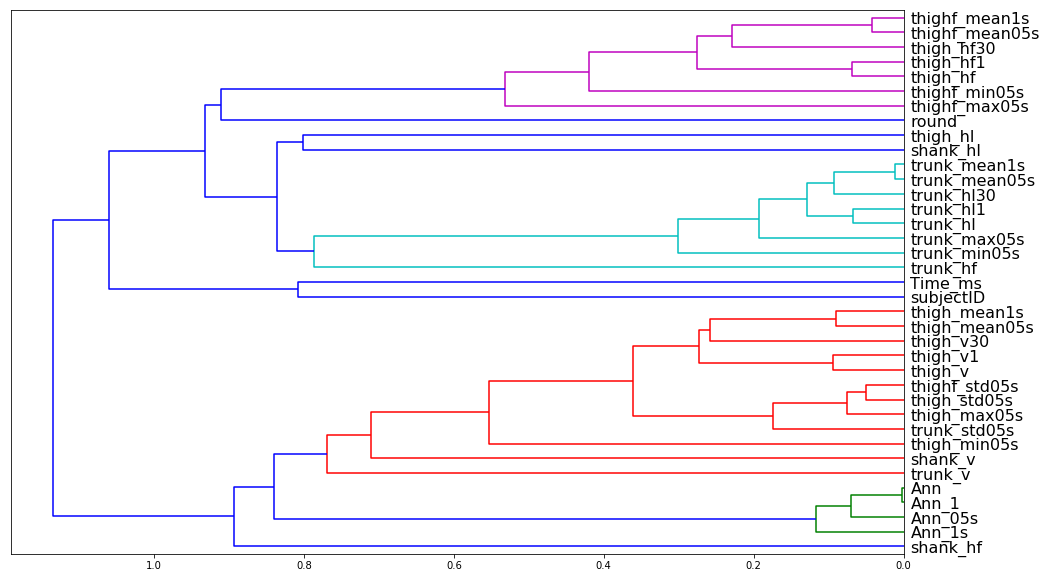

In [65]:
corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
plt.show()

### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr = {}
params = {"C": np.random.uniform(0.1,10,size=100) , "solver":["lbfgs", "liblinear"]}
lr["randomcv"] = RandomizedSearchCV(estimator = LogisticRegression(max_iter=100) ,param_distributions=params,cv=10, n_jobs=-1, verbose=1)

In [68]:
lr["learn"] = lr["randomcv"].fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 12.6min finished


In [69]:
lr["focal_params"] = {"C":lr["learn"].best_estimator_.get_params()["C"],
                     "solver":lr["learn"].best_estimator_.get_params()["solver"]}

In [70]:
lr["focal_params"]

{'C': 9.499187752577063, 'solver': 'liblinear'}

In [71]:
lr_fine_tuned = {"C":[lr["focal_params"]["C"]*i/10. for i in range(1,20)],
                "solver":[lr["focal_params"]["solver"]]}

In [72]:
lr["gridcv"] = GridSearchCV(estimator = LogisticRegression() ,param_grid=lr_fine_tuned,cv=10, n_jobs=-1, verbose=3)

In [73]:
lr["tuned_model"] = lr["gridcv"].fit(X_train,y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed: 22.1min finished


In [74]:
lr["train_acc"] = lr["tuned_model"].best_estimator_.score(X_train,y_train)
lr["test_acc"] = lr["tuned_model"].best_estimator_.score(X_test,y_test)
lr["P(freeze)"] = lr["tuned_model"].best_estimator_.predict_proba(X_test)[:,1]
lr["yhat"] = lr["tuned_model"].best_estimator_.predict(X_test)
lr["confus_mat"] = confusion_matrix(y_test,lr["yhat"], labels=[1,2])
lr["auc"] = round(roc_auc_score(y_test,lr["P(freeze)"]),2)
lr["roc"] = roc_curve(y_test , lr["P(freeze)"], pos_label=2)

In [75]:
lr['confus_mat']

array([[204992,    898],
       [ 20839,   1318]])

In [76]:
lr["auc"]

0.81

In [78]:
report(y_test,lr['yhat'],lr["P(freeze)"])

              precision    recall  f1-score   support

         1.0       0.91      1.00      0.95    205890
         2.0       0.59      0.06      0.11     22157

    accuracy                           0.90    228047
   macro avg       0.75      0.53      0.53    228047
weighted avg       0.88      0.90      0.87    228047

 AUC 0.8078553843451264


In [79]:
lr['tuned_model']

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.94991877525770...
                               4.7495938762885315, 5.699512651546238,
                               6.649431426803945, 7.59935020206165,
                               8.549268977319356, 9.499187752577063,
                               10.449106527834768, 11.399025303092476,
               

## Multilayer Perceptron

In [80]:
from sklearn.neural_network import MLPClassifier

In [81]:
mlp = MLPClassifier(alpha=1e-5,hidden_layer_sizes=(24,36,48,60,30,15,8,), random_state=1, max_iter=250, learning_rate_init=1e-3, verbose=1)

In [82]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.20195592
Iteration 2, loss = 0.17233669
Iteration 3, loss = 0.16399923
Iteration 4, loss = 0.15819934
Iteration 5, loss = 0.15353953
Iteration 6, loss = 0.14937017
Iteration 7, loss = 0.14585153
Iteration 8, loss = 0.14323245
Iteration 9, loss = 0.14052049
Iteration 10, loss = 0.13822735
Iteration 11, loss = 0.13632909
Iteration 12, loss = 0.13475516
Iteration 13, loss = 0.13302180
Iteration 14, loss = 0.13183263
Iteration 15, loss = 0.13034376
Iteration 16, loss = 0.12916300
Iteration 17, loss = 0.12804869
Iteration 18, loss = 0.12703389
Iteration 19, loss = 0.12615502
Iteration 20, loss = 0.12535890
Iteration 21, loss = 0.12434624
Iteration 22, loss = 0.12373181
Iteration 23, loss = 0.12300026
Iteration 24, loss = 0.12210104
Iteration 25, loss = 0.12155523
Iteration 26, loss = 0.12091712
Iteration 27, loss = 0.12037276
Iteration 28, loss = 0.11974356
Iteration 29, loss = 0.11923188
Iteration 30, loss = 0.11859361
Iteration 31, loss = 0.11790111
Iteration 32, los

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(24, 36, 48, 60, 30, 15, 8),
              learning_rate='constant', learning_rate_init=0.001, max_iter=250,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [83]:
y_hat = mlp.predict(X_test)

In [84]:
y_prob = mlp.predict_proba(X_test)[:,1]

In [85]:
confusion_matrix(y_test,y_hat, labels=[1,2])

array([[201500,   4390],
       [  6175,  15982]])

In [86]:
report(y_test,y_hat,y_prob)

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97    205890
         2.0       0.78      0.72      0.75     22157

    accuracy                           0.95    228047
   macro avg       0.88      0.85      0.86    228047
weighted avg       0.95      0.95      0.95    228047

 AUC 0.9783062416123713


In [94]:
#Try Reduce nodes
mlp = MLPClassifier(alpha=1e-5,hidden_layer_sizes=(12,16,20,16,12,8,4,), random_state=1, max_iter=250, learning_rate_init=1e-3, verbose=1)

In [95]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.21987045
Iteration 2, loss = 0.19309360
Iteration 3, loss = 0.18529722
Iteration 4, loss = 0.18045177
Iteration 5, loss = 0.17758865
Iteration 6, loss = 0.17570006
Iteration 7, loss = 0.17385449
Iteration 8, loss = 0.17238504
Iteration 9, loss = 0.17142637
Iteration 10, loss = 0.17032175
Iteration 11, loss = 0.16927879
Iteration 12, loss = 0.16836907
Iteration 13, loss = 0.16789848
Iteration 14, loss = 0.16712094
Iteration 15, loss = 0.16658929
Iteration 16, loss = 0.16610314
Iteration 17, loss = 0.16565553
Iteration 18, loss = 0.16521629
Iteration 19, loss = 0.16500372
Iteration 20, loss = 0.16432740
Iteration 21, loss = 0.16402329
Iteration 22, loss = 0.16367366
Iteration 23, loss = 0.16305888
Iteration 24, loss = 0.16282436
Iteration 25, loss = 0.16242074
Iteration 26, loss = 0.16211201
Iteration 27, loss = 0.16175940
Iteration 28, loss = 0.16147322
Iteration 29, loss = 0.16099987
Iteration 30, loss = 0.16071992
Iteration 31, loss = 0.16032082
Iteration 32, los

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(12, 16, 20, 16, 12, 8, 4),
              learning_rate='constant', learning_rate_init=0.001, max_iter=250,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [96]:
y_hat = mlp.predict(X_test)

In [97]:
y_prob = mlp.predict_proba(X_test)[:,1]

In [98]:
confusion_matrix(y_test,y_hat, labels=[1,2])

array([[201284,   4606],
       [ 10006,  12151]])

In [99]:
report(y_test,y_hat,y_prob)

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96    205890
         2.0       0.73      0.55      0.62     22157

    accuracy                           0.94    228047
   macro avg       0.84      0.76      0.79    228047
weighted avg       0.93      0.94      0.93    228047

 AUC 0.9583837418279448


Didn't get better

### EasyEnsembleClassifier

In [87]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [88]:
eec = EasyEnsembleClassifier(n_estimators=10, n_jobs=-1, random_state=0, verbose=3)

In [89]:
eec.fit(X_train,y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.5min finished


EasyEnsembleClassifier(base_estimator=None, n_estimators=10, n_jobs=-1,
                       random_state=0, replacement=False,
                       sampling_strategy='auto', verbose=3, warm_start=False)

In [90]:
y_hat = eec.predict(X_test)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   10.5s finished


In [91]:
y_prob = mlp.predict_proba(X_test)[:,1]

In [92]:
confusion_matrix(y_test,y_hat, labels=[1,2])

array([[148333,  57557],
       [  2389,  19768]])

In [93]:
report(y_test,y_hat,y_prob)

              precision    recall  f1-score   support

         1.0       0.98      0.72      0.83    205890
         2.0       0.26      0.89      0.40     22157

    accuracy                           0.74    228047
   macro avg       0.62      0.81      0.61    228047
weighted avg       0.91      0.74      0.79    228047

 AUC 0.9783062416123713
